# **Regression**
1. Choose 3-4 regression models (e.g., LightGBM, XGBoost) and train them to predict “Gap” target variable on default parameters (use 10-fold cross-validation)
Note: every model has use example on scikit-learn.org

2. Visualize the results via R2 plot (predicted vs. real), compare the models’ performance and training speed

3. Optimize the best-performing model using hyperparameters tuning (grid search)


In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
df = pd.read_csv('/content/df_CPs.csv')

In [ ]:
df

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,smiles,gap
0,0,-0.339214,0.442302,0.159721,-0.461903,-0.236782,0.702281,0.176595,0.378853,-0.370039,...,-0.080061,0.067852,-0.039111,0.154440,0.079698,-0.043792,-0.117808,-0.022823,O=CC1CCC2OC2C1,0.2258
1,1,-0.643303,0.098820,0.165701,-0.437282,0.104974,0.426370,0.457961,-0.110241,-0.371135,...,-0.044334,0.051943,-0.048330,0.059093,0.093159,0.036363,0.025190,0.091761,COC12CC=C3CC1C23,0.1826
2,2,0.126477,-0.011759,0.013490,-0.156802,-0.393077,0.036280,0.045197,0.235364,0.210192,...,-0.024181,-0.006624,0.005069,-0.043225,-0.001808,0.049079,-0.079340,0.044904,OC1CCC(=O)C1,0.2209
3,3,-0.078209,-0.031696,0.678240,0.245904,0.196744,0.980741,-0.133933,-0.033095,-0.289892,...,0.106457,0.105640,-0.011042,-0.006389,-0.051015,-0.096002,0.141883,0.029436,N#CC12NC3CNC1C23,0.2368
4,4,-0.135424,-0.594030,-0.330410,-0.079832,0.133053,-0.016324,0.335906,-0.153286,0.355254,...,-0.088894,-0.042282,0.083902,-0.052619,0.028385,-0.080537,-0.009442,-0.135750,CC(=NO)CC(C)(C)C,0.2507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,19976,-0.033615,0.437328,0.373794,0.133691,0.419226,-0.151528,-0.095548,0.001703,-0.008845,...,0.071868,-0.029205,0.033890,-0.022481,-0.040726,-0.022581,0.031258,0.030001,c1nc(no1)CO,0.2503
19977,19977,-0.049046,-0.590533,-0.218991,-0.091756,0.087148,-0.033772,-0.129681,-0.096177,-0.394211,...,0.110349,0.148339,-0.173841,-0.032819,0.140679,-0.028995,0.001284,0.006364,C1OC2CC=CC3C1C23,0.2493
19978,19978,0.014199,-0.728073,-0.453850,-0.100943,-0.091309,0.015275,-0.036137,-0.476937,-0.089477,...,-0.026064,-0.007584,0.105254,0.136299,0.096911,0.062190,-0.039858,-0.037964,C[NH+]=C1NCC1C([O-])=O,0.2342
19979,19979,0.889089,0.285766,-0.114927,-0.063618,0.015302,-0.109214,0.455168,0.358017,-0.187704,...,-0.200711,-0.028286,0.086818,0.095097,-0.009952,-0.041632,-0.021918,-0.087378,c1c(coc1N2CC2)O,0.2179


In [11]:
# для оценки важности компонент
df = df.drop(columns=['Unnamed: 0', 'smiles']) #по хорошему его надо было закодировать с самого начала, но я об этом не подумала, роэтому сейчас я хочу удалить его и посмотреть как пойдёт

In [12]:
df = df.dropna()

# раздел борьбы со smiles, который я для чего-то берегла, можно не смотреть
не запускать - это чисто для сравнения было

скорее всего их надо было закодировать с самого начала или выбросить сейчас, но мне казалось, что со smmiles понятней, я не работаю со smiles обычно

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19981 entries, 0 to 19980
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19981 non-null  int64  
 1   PC1         19981 non-null  float64
 2   PC2         19981 non-null  float64
 3   PC3         19981 non-null  float64
 4   PC4         19981 non-null  float64
 5   PC5         19981 non-null  float64
 6   PC6         19981 non-null  float64
 7   PC7         19981 non-null  float64
 8   PC8         19981 non-null  float64
 9   PC9         19981 non-null  float64
 10  PC10        19981 non-null  float64
 11  PC11        19981 non-null  float64
 12  PC12        19981 non-null  float64
 13  PC13        19981 non-null  float64
 14  PC14        19981 non-null  float64
 15  PC15        19981 non-null  float64
 16  PC16        19981 non-null  float64
 17  PC17        19981 non-null  float64
 18  PC18        19981 non-null  float64
 19  PC19        19981 non-nul

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
smiles_encoded = label_encoder.fit_transform(df['smiles'])
encoded_df = pd.DataFrame(smiles_encoded, columns=['encoded_smiles'])

In [ ]:
df_encoded = pd.concat([df, encoded_df], axis=1)
df = df_encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19981 entries, 0 to 19980
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      19981 non-null  int64  
 1   PC1             19981 non-null  float64
 2   PC2             19981 non-null  float64
 3   PC3             19981 non-null  float64
 4   PC4             19981 non-null  float64
 5   PC5             19981 non-null  float64
 6   PC6             19981 non-null  float64
 7   PC7             19981 non-null  float64
 8   PC8             19981 non-null  float64
 9   PC9             19981 non-null  float64
 10  PC10            19981 non-null  float64
 11  PC11            19981 non-null  float64
 12  PC12            19981 non-null  float64
 13  PC13            19981 non-null  float64
 14  PC14            19981 non-null  float64
 15  PC15            19981 non-null  float64
 16  PC16            19981 non-null  float64
 17  PC17            19981 non-null 

In [ ]:
# Инициализируйте MinMaxScaler
minmax_scaler = MinMaxScaler()

# Нормализуйте столбец с закодированными значениями SMILES
encoded_smiles_normalized = minmax_scaler.fit_transform(encoded_df[['encoded_smiles']])

# Создайте DataFrame с нормализованными значениями SMILES
normalized_encoded_df = pd.DataFrame(encoded_smiles_normalized, columns=['normalized_encoded_smiles'])

# Добавьте нормализованные значения обратно в ваш исходный DataFrame
df_encoded_normalized = pd.concat([df_encoded, normalized_encoded_df], axis=1)

In [ ]:
df =df_encoded_normalized
df = df.drop(columns=['smiles', 'encoded_smiles'])
df['normalized_encoded_smiles']

0        0.826938
1        0.638650
2        0.904829
3        0.720998
4        0.132488
           ...   
19976    0.997646
19977    0.111501
19978    0.675917
19979    0.968443
19980    0.976057
Name: normalized_encoded_smiles, Length: 19981, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19981 entries, 0 to 19980
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19981 non-null  int64  
 1   PC1                        19981 non-null  float64
 2   PC2                        19981 non-null  float64
 3   PC3                        19981 non-null  float64
 4   PC4                        19981 non-null  float64
 5   PC5                        19981 non-null  float64
 6   PC6                        19981 non-null  float64
 7   PC7                        19981 non-null  float64
 8   PC8                        19981 non-null  float64
 9   PC9                        19981 non-null  float64
 10  PC10                       19981 non-null  float64
 11  PC11                       19981 non-null  float64
 12  PC12                       19981 non-null  float64
 13  PC13                       19981 non-null  flo

In [ ]:
df = df.dropna()

In [ ]:
# Переименовать столбцы так, чтобы они содержали только буквы, цифры и символ подчеркивания
df.columns = ["".join(c if c.isalnum() or c == "_" else "_" for c in str(col)) for col in df.columns]
df = df.drop('Unnamed__0', axis=1)
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,gap,normalized_encoded_smiles
0,-0.339214,0.442302,0.159721,-0.461903,-0.236782,0.702281,0.176595,0.378853,-0.370039,0.382089,...,-0.080061,0.067852,-0.039111,0.154440,0.079698,-0.043792,-0.117808,-0.022823,0.2258,0.826938
1,-0.643303,0.098820,0.165701,-0.437282,0.104974,0.426370,0.457961,-0.110241,-0.371135,-0.127971,...,-0.044334,0.051943,-0.048330,0.059093,0.093159,0.036363,0.025190,0.091761,0.1826,0.638650
2,0.126477,-0.011759,0.013490,-0.156802,-0.393077,0.036280,0.045197,0.235364,0.210192,-0.173686,...,-0.024181,-0.006624,0.005069,-0.043225,-0.001808,0.049079,-0.079340,0.044904,0.2209,0.904829
3,-0.078209,-0.031696,0.678240,0.245904,0.196744,0.980741,-0.133933,-0.033095,-0.289892,-0.252373,...,0.106457,0.105640,-0.011042,-0.006389,-0.051015,-0.096002,0.141883,0.029436,0.2368,0.720998
4,-0.135424,-0.594030,-0.330410,-0.079832,0.133053,-0.016324,0.335906,-0.153286,0.355254,-0.012943,...,-0.088894,-0.042282,0.083902,-0.052619,0.028385,-0.080537,-0.009442,-0.135750,0.2507,0.132488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,-0.033615,0.437328,0.373794,0.133691,0.419226,-0.151528,-0.095548,0.001703,-0.008845,-0.100168,...,0.071868,-0.029205,0.033890,-0.022481,-0.040726,-0.022581,0.031258,0.030001,0.2503,0.997646
19977,-0.049046,-0.590533,-0.218991,-0.091756,0.087148,-0.033772,-0.129681,-0.096177,-0.394211,-0.224154,...,0.110349,0.148339,-0.173841,-0.032819,0.140679,-0.028995,0.001284,0.006364,0.2493,0.111501
19978,0.014199,-0.728073,-0.453850,-0.100943,-0.091309,0.015275,-0.036137,-0.476937,-0.089477,-0.592685,...,-0.026064,-0.007584,0.105254,0.136299,0.096911,0.062190,-0.039858,-0.037964,0.2342,0.675917
19979,0.889089,0.285766,-0.114927,-0.063618,0.015302,-0.109214,0.455168,0.358017,-0.187704,0.012368,...,-0.200711,-0.028286,0.086818,0.095097,-0.009952,-0.041632,-0.021918,-0.087378,0.2179,0.968443


# Построим модели LightGBM, XGBoost и RandomForestRegressor

In [13]:
#будем сранивать скорость обучения
import time

In [14]:
X = df.drop('gap', axis=1)  # 'gap' - это целевая переменная
y = df['gap']

# Модели
dt_regressor = DecisionTreeRegressor()
rf_regressor = RandomForestRegressor()
xgb_regressor = XGBRegressor()
lgbm_regressor = LGBMRegressor(force_col_wise=True)

# Для каждой модели считаем время обучения
start_time = time.time()
dt_regressor.fit(X, y)
dt_training_time = time.time() - start_time

start_time = time.time()
rf_regressor.fit(X, y)
rf_training_time = time.time() - start_time

start_time = time.time()
xgb_regressor.fit(X, y)
xgb_training_time = time.time() - start_time

start_time = time.time()
lgbm_regressor.fit(X, y)
lgbm_training_time = time.time() - start_time

[LightGBM] [Info] Total Bins 15045
[LightGBM] [Info] Number of data points in the train set: 19964, number of used features: 59
[LightGBM] [Info] Start training from score 0.251751


In [ ]:
rf_scores = cross_val_score(rf_regressor, X, y, cv=10, scoring='r2')

xgb_scores = cross_val_score(xgb_regressor, X, y, cv=10, scoring='r2')

lgbm_scores = cross_val_score(lgbm_regressor, X, y, cv=10, scoring='r2')

dt_scores = cross_val_score(dt_regressor, X, y, cv=10, scoring='r2')

[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 17967, number of used features: 60
[LightGBM] [Info] Start training from score 0.251694
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 17967, number of used features: 60
[LightGBM] [Info] Start training from score 0.251703
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 17967, number of used features: 60
[LightGBM] [Info] Start training from score 0.251616
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 17967, number of used features: 60
[LightGBM] [Info] Start training from score 0.251934
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 17968, number of used features: 60
[LightGBM] [Info] Start training from score 0.251834
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 17

In [15]:
print(f'Время обучения каждой модели: RandomForest={rf_training_time}, XGBoost={xgb_training_time}, LightGBM={lgbm_training_time}, DecisionTree={dt_training_time}', sep='\n')

Время обучения каждой модели: RandomForest=189.32825589179993, XGBoost=5.0635106563568115, LightGBM=1.5171940326690674, DecisionTree=3.0803987979888916


Как можно заметить модель рандомного леса работала очень долго, и модель LGB справилась быстрее всего.

In [ ]:
print("Random Forest R^2:", rf_scores.mean())
print("XGBoost R^2:", xgb_scores.mean())
print("LightGBM R^2:", lgbm_scores.mean())
print("Decision Tree R^2:", dt_scores.mean()) #возможно эта модель не подходит для таких данных

Random Forest R^2: 0.31006026881356297
XGBoost R^2: 0.1820377086154617
LightGBM R^2: 0.25114686230953553
Decision Tree R^2: -0.3046750313441247


Cкорее всего дескрипторы неинформативные и на каком-то этапе feature engeneering или очистки произошли ошибки, нужно посмотреть

2. Нужно сделать визуализацию данных по заданию -  реальны/предсказанные, поэтому сделаю её на одной из самых быстрых моделей, чтобы ещё раз убедиться, что всё плохо. Однако так как у меня получаются очень плохие предсказания, поэтому делать визуализации для кжадой модели не имеет смысла, поэтому построим только для одной. Так как метрика R^2 итак намекает на то, что компоненты плохо объясняют целевую переменнную gap.


In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
X = df.drop('gap', axis=1)  # 'gap' - это целевая переменная
y = df['gap']

In [ ]:
dt_regressor = DecisionTreeRegressor()
dt_scores = cross_val_score(dt_regressor, X, y, cv=10, scoring='r2')

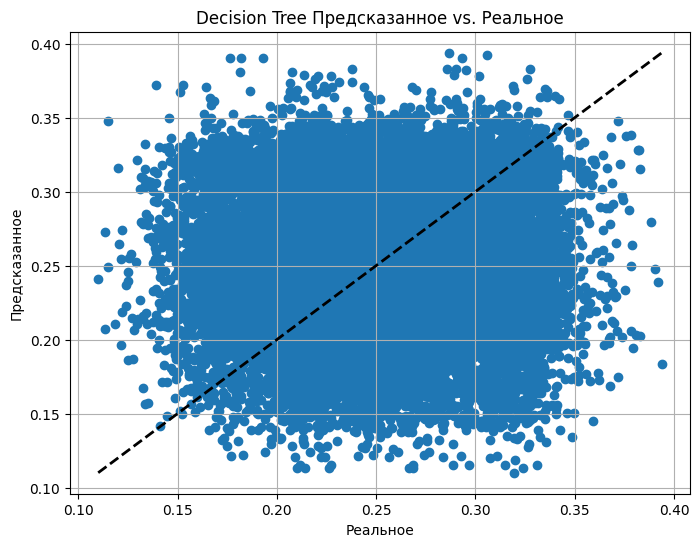

In [ ]:
dt_regressor = DecisionTreeRegressor()

predicted_dt = cross_val_predict(dt_regressor, X, y, cv=10)

# Визуализация предсказанных значений по сравнению с реальными значениями
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_dt)
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)
plt.xlabel('Реальное')
plt.ylabel('Предсказанное')
plt.title('Decision Tree Предсказанное vs. Реальное')
plt.grid(True)
plt.show()

Как видно дерево принятия решений переобучается

In [ ]:
#Сравним r^2 для каждой модели кроме linear
r2_scores = [dt_scores.mean(), rf_scores.mean(), lgbm_scores.mean(), xgb_scores.mean()]
models = ['DT', 'RF', 'GBM', 'XGB'] #LightGBM - GBM - опечатка

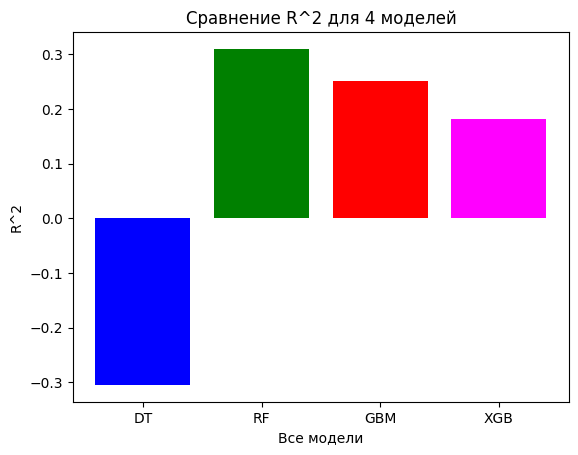

In [ ]:
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'magenta'])
plt.xlabel('Все модели')
plt.ylabel('R^2')
plt.title('Сравнение R^2 для 4 моделей')
plt.show()

Как видно на графике выше r^2 лучше всего у RandomForest, однака всё ещё очень далека от 1

Подбор оптимальных гиперпараметров для LGBMRegressor, так как у неё оптимальное соотношение время и r^2

In [ ]:
param_grid = {
    'n_estimators': [20, 50, 100],         # Количество деревьев
    'max_depth': [10, 20],             # Максимальная глубина
    'num_leaves': [31, 50]             # Количество листьев
}

lgbm_regressor = LGBMRegressor(force_col_wise=True)
grid_search_lgbm = GridSearchCV(lgbm_regressor, param_grid, cv=10)
grid_search_lgbm.fit(X, y)

print(f'Наилучшие параметры: {grid_search_lgbm.best_params_} для LGBMRegressor')
print(f'Наилучшее значение R^2: {grid_search_lgbm.best_score_}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 17967, number of used features: 60
[LightGBM] [Info] Start training from score 0.251694
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Total Bins 15300
[LightGBM] [Info] Number of data points in the train set: 17967, number of used features: 60
[LightGBM] [Info] Start training from sco

Было R^2=0.25114686230953553
стало r^2=0.2621641554928166, незначительно улучшилось, но мы выполнили задачу использовать grid search - "оптимизировали результат с помощью подбора гиперпараметров"

Из-за такой низкой метрики R^2 на всех моделях, я предполгаю, что что-то пошло не так при подборе главных компонент. И хочу сейчас проверить информативность дескрипторов.

# **Важность компонентов**

In [ ]:
df = df.drop(columns=['smiles'])

In [ ]:
df = df.dropna() #откуда появляются nan? Перед PCA NAN не было и после неё тоже не было
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19964 entries, 0 to 19980
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19964 non-null  int64  
 1   PC1         19964 non-null  float64
 2   PC2         19964 non-null  float64
 3   PC3         19964 non-null  float64
 4   PC4         19964 non-null  float64
 5   PC5         19964 non-null  float64
 6   PC6         19964 non-null  float64
 7   PC7         19964 non-null  float64
 8   PC8         19964 non-null  float64
 9   PC9         19964 non-null  float64
 10  PC10        19964 non-null  float64
 11  PC11        19964 non-null  float64
 12  PC12        19964 non-null  float64
 13  PC13        19964 non-null  float64
 14  PC14        19964 non-null  float64
 15  PC15        19964 non-null  float64
 16  PC16        19964 non-null  float64
 17  PC17        19964 non-null  float64
 18  PC18        19964 non-null  float64
 19  PC19        19964 non-null  fl

Посмотрим на корреляцию данных и на важность компонент

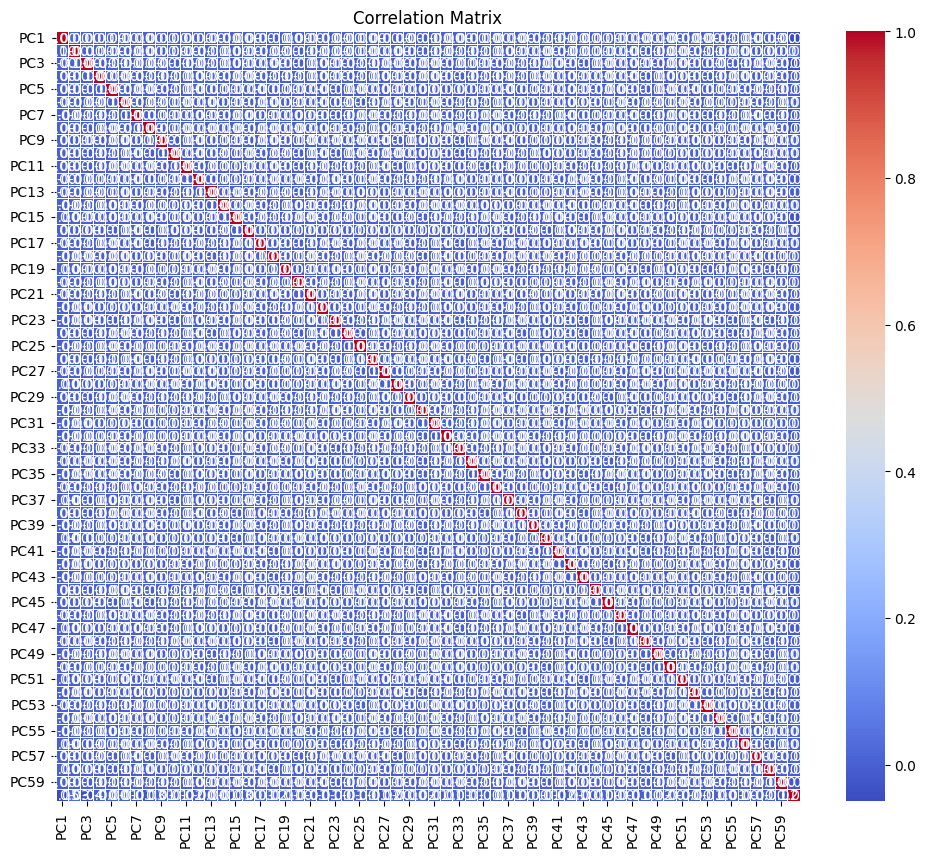

In [ ]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Видимо корреляции между компонентами нет, может важность компонент страдает и поэтому такой плохой выход у R^2?

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
X = df.drop('gap', axis=1)
y = df['gap']

selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

#Оценка важности
feature_scores = selector.scores_

1. Видимо наибольшую важность имеют PC1, PC3, PC2, PC8
2. Попробую сделать датасет из этих компонент и обучить модели снова

In [ ]:
# Создаем DataFrame с именами признаков и их оценками важности
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Сортируем по убыванию оценки важности
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Выводим список признаков с оценками важности
print(feature_scores_df)

ValueError: All arrays must be of the same length

Поскольку многие дескрипторы оказались неинформативные из-за чего модели обучаются достаточно плохо, что можно увидеть на метрике R^2, дескрипторы плохо объясняют целевые переменны. Поэтому по-хорошому мне надо вернуться на шаг PCA и переделать шаги.